## Report: Correlation between rates of accidents in Germany and Münster with Bicycle counting stations in Münster
<span style="font-size: 20px;"><b>Contents :</b> </span>
 
 
 1. Introduction
 2. Data Source
 3. Installation of dependencies
 4. Loading Data
 5. Answering broad questions
     -  Question 1 and Inference 1
     -  Question 2 and Inference 2
     -  Question 3 and Inference 3
 6. Conclusion
 7. Questions for further research



# Introduction

Münster, a city in North Rhine-Westphalia, is the home to an estimated 500,000 bicycles. It is famous for its bike-friendly streets and is hence popularly known as the "Bicycle capital of Germany". 
We see an increase in the bicycle traffic in Münster in the recent years. 
Separately we see an increase in the rate of total accident rates in Germany as well. This hence gives rise to the following mentioned two broad questions 
-  What is the inference from Bicycle counting stations in Münster? Does the number of Bicycles increased from 2020 to 2021?
-  What is the change of accident rate across Germany? Has the accident rate increased or decreased from 2020 to 2021?
-  What is the change of accident rate across Münster? Has the accident rate increased or decreased from 2020 to 2021?


# Data Source

This project uses open data from  the following data source as follows : 

1. Datasource 1:Mobilithek
    -  Metadata URL 1: https://mobilithek.info/offers/-6901989592576801458
    -  Data URL 1: https://opendata.stadt-muenster.de/dataset/verkehrsz%C3%A4hlung-fahrradverkehr-tagesaktuelle-daten/resource/c072d000-ffb3-4e79-8811
    -  Description: This is the data from bicycle counting stations in city of Münster from the website of Mobilithek. This data captures bicycle counts over the years 2018,2019,2020,2021 and 2022. We focus on the data from June 2020 to August 2021.


2. Datasource 2:Federal Statistical Office of Germany
    -  Metadata URL 2:  https://www.destatis.de/
    -  Data URL 2:  https://www.destatis.de/
    -  Description: This data gives us a total count of road accident across Germany from the Federal Statistical Office of Germany. It gives us different types of accident data like accidents with personal injuries, serious injuries, accidents on freeway etc. We consider the Total count of the accidents from this dataset.
    
3. Datasource 3:Münster Polizie Nordrhein-Westfalen
    -  Metadata URL 3:  https://muenster.polizei.nrw/artikel/verkehrsunfallstatistik-2021-1
    -  Data URL 3:  https://muenster.polizei.nrw/sites/default/files/2022-03/Verkehrsunfallbilanz%202021
    -  Description: This data gives us the count of road accidents in city of Münster. This data is also divided into subgroups such as traffic accidents involving children, traffic accidents involving young people etc. We consider the Total traffic accidents count from this as well.
       
 



The question that interests us is: Who runs trainstops in germany and where?

## Installation of dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [13]:
%pip install pandas
%pip install plotly
%pip install SQLAlchemy==1.4.46
%pip install nbformat
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 1.6/1.6 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Loading data
Creating pandas dataframe using the local sqlite file.

In [5]:
import pandas as pd

# Read the table Bicycle Count into a Pandas dataframe
df = pd.read_sql_table('Bike_Count', 'sqlite:///my_database.db')

# Read the table Total Accidents in Münster into a Pandas dataframe
df_road_signs = pd.read_sql_table('Accident_Münster', 'sqlite:///my_database.db')

# Read the table Total Accidents in Germany into a Pandas dataframe
df_road_signs = pd.read_sql_table('Accident_Germany', 'sqlite:///my_database.db')

## Answering the Broad questions
In the following sub-section we aim to answer all the broad questions that we have been looking into in this project.


# 1. What is the inference from Bicycle counting stations in Münster? Does the number of Bicycles increased from 2020 to 2021

To answer our first question, we use plotly to draw a scatterplot of the data of the total Bicycle count, which is a sum of the bicycle counts (every 15 seconds) across Mauritztor and  salzstraße (two of the busiest location in Münster owing to their location near the MünsterCentrum) along the different months starting from June 2020 to August 2021.

We choose the :
-  x-axis as the month and year under consideration
-  y-axis as the total bicycle count in that particular month


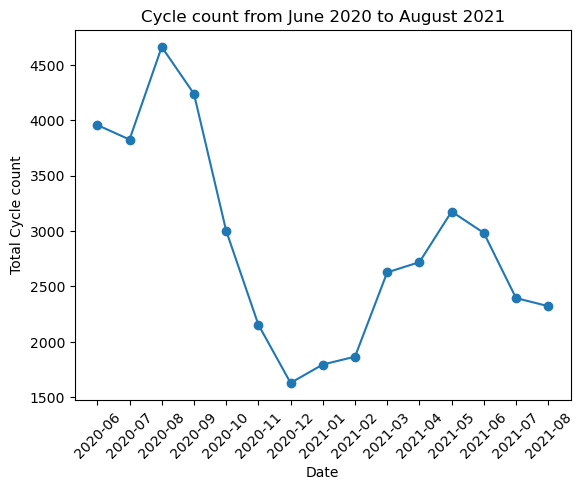

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

csv_files = ['C:/Users/reham/Desktop/2020-06.csv','C:/Users/reham/Desktop/2020-07.csv', 'C:/Users/reham/Desktop/2020-08.csv', 'C:/Users/reham/Desktop/2020-09.csv', 'C:/Users/reham/Desktop/2020-10.csv','C:/Users/reham/Desktop/2020-11.csv','C:/Users/reham/Desktop/2020-12.csv','C:/Users/reham/Desktop/2021-01.csv','C:/Users/reham/Desktop/2021-02.csv','C:/Users/reham/Desktop/2021-03.csv','C:/Users/reham/Desktop/2021-04.csv','C:/Users/reham/Desktop/2021-05.csv','C:/Users/reham/Desktop/2021-06.csv','C:/Users/reham/Desktop/2021-07.csv','C:/Users/reham/Desktop/2021-08.csv']  # List of CSV file names

x_values = []
y_values = []

for file_path in csv_files:
    file_name = os.path.basename(file_path)  # Extract the base file name
    file_name = os.path.splitext(file_name)[0]  # Remove the file extension
    x_values.append(file_name)
    
    df = pd.read_csv(file_path)
    y_values.append(df['Column 3 Sum'].iloc[-1])

plt.plot(x_values, y_values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Cycle count')
plt.title('Cycle count from June 2020 to August 2021')
plt.xticks(rotation=45)
plt.show()



# Inference for question 1:

We can draw the following inference from the above graph : 

1. We see a steep decline as we approach the winter months with an increase again from the month of January
2. We see a count of 3925 and 3826 in June and July 2020 respectively, whereas we see a count of 2983 and 2395 in June and July of 2021 respectively. Comparing these datas show us a significant decrease in rate by almost a 1000.
3. We had observed a steep in August 2020 but we don't see any similar steep in August 2021. We see a rather decline with a total count of 2322.


# 2. What is the change of accident rate across Germany? Has the accident rate increased or decreased from 2020 to 2021

To answer our second question, we use plotly to draw a scatterplot of the data of the total accident count, which is a sum of 
different categories of accidents for example accidents with personal injuries, serious injuries, accidents on freeway etc. along the two years in focus, namely 2020 and 2021.

We choose the :
-  x-axis as the year under consideration
-  y-axis as the total accident count in that particular year


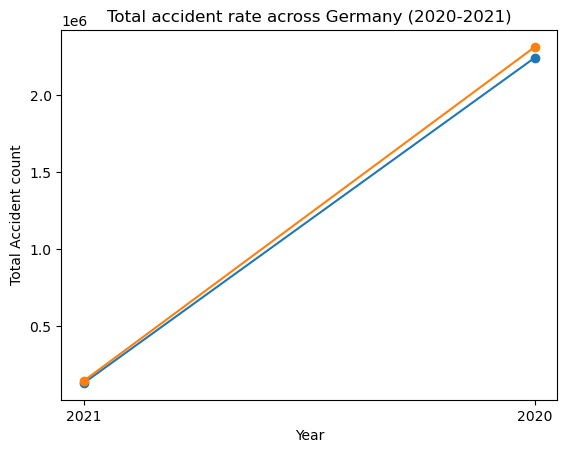

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('C:/Users/reham/Desktop/AccidentData2.xlsx')

# Set the row index
df.set_index(df.columns[0], inplace=True)

# Select the last two columns as X-axis values
x_values = df.columns[-2:].tolist()

# Extract the 'Total' values for the last two columns
y_values = df.loc['Total', x_values].tail(2).values

# Prepare the x-axis tick labels
x_labels = ['2021', '2020']

# Plot the graph
plt.plot(x_labels, y_values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Accident count')
plt.title('Total accident rate across Germany (2020-2021)')
plt.show()


# Inference for question 2:

We can draw the following inference from the above graph : 

1. We see a increase in the total accident count across Germany from the year 2020 to 2021.
2. The rate of increase of accidents is comparatively low, which is a good.


# 3. What is the change of accident rate across Münster? Has the accident rate increased or decreased from 2020 to 2021

To answer our third question, we use plotly to draw a scatterplot of the data of the total accident count, which is a sum of 
different categories of accidents for example accidents which are divided into subgroups such as traffic accidents involving children, traffic accidents involving young people etc. along the two years in focus, namely 2020 and 2021.

We choose the :
-  x-axis as the year under consideration
-  y-axis as the total accident count in Münster in that particular year 

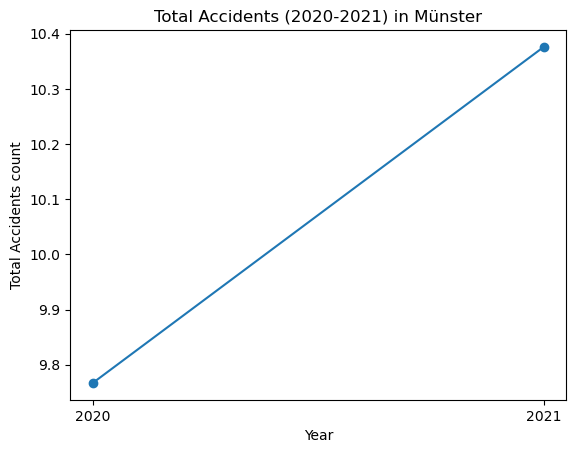

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel("C:/Users/reham/Desktop/Accident Data Münster2.xlsx")

# Set the row index
df.set_index(df.columns[0], inplace=True)

# Select the last two columns as X-axis values
x_values = df.columns[-2:].tolist()

# Extract the 'Verkehrsunfälle gesamt' values for the last two columns
y_values = df.loc['Verkehrsunfälle gesamt', x_values]

# Prepare the x-axis tick labels
x_labels = ['2020', '2021']

# Plot the graph
plt.plot(x_labels, y_values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Accidents count')
plt.title('Total Accidents (2020-2021) in Münster')
plt.show()


# Inference for question 3:

We can draw the following inference from the above graph : 

1. We see a steep increase in the total accident in Münster from the year 2020 to 2021.
2. The rate of increase of accidents is from 9,767 in 2020 to 10,376 in 2021, which shows a significant increase


# Conclusion:

In the conclusion we try to answer the following mentioned questions : 

1.  <b>How is the total accident across Germany related to the accident rate in Münster?</b>

The second and third graph shows a almost similar rate of increase in accident rates. Therefore, we can conclude that the increase in rate of accidents in Germany definitely closely related to the the increase in the rate of accidents in the city of Münster.

2. <b>How is the accident rate in Münster related with the bicycle count across the major locations of Münsters?</b>

We can see that the bicycle count has significantly decreased in the major summer months from the year 2020 to the year 2021, whereas the accidents in Münster has increased



# Questions for further research:

Although we came to certain conclusion from our research. The following question stay open for further research : 

1.  <b>How is the total accident across Germany related to the accident rate due to bicycles in Münster?</b>

2. <b>Why does Münster, the bicycle capital see a decrease in cyclist?</b>

3. <b>Is the decrease in bicycle count linked with the increased rate of accidents, causing citizens of Münster to cycle less frequently?</b>


